## Chunking in NLP & LLMs

**What is Chunking?**

- **Chunking** is the process of dividing text into **meaningful segments** called **chunks**.
- Unlike POS tagging (which assigns a tag to each word), **chunking groups words together** to form higher-level units like Noun Phrases, Verb Phrases, and Prepositional Phrases.
- Example:
    - "The black dog" → **Noun Phrase (NP)**
    - "is running" → **Verb Phrase (VP)**
    - "in the park" → **Prepositional Phrase (PP)**

- **Why is Chunking Important?**

- Helps extract meaningful **phrases** instead of individual words.
- Useful in **Information Extraction, Named Entity Recognition, Question Answering, LLM preprocessing.**
- Interview Tip → “Explain Chunking in NLP and in LLMs” is a common question.
Chunking in NLP using NLTK


# Chunking in NLP using NLTK

In [1]:
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

# Download required NLTK data files 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91918\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91918\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Sample text
text = "full stack datascience, generative ai, agenti ai, llm model keep increase by different compnay"

# Tokenize
tokens = word_tokenize(text)

# POS Tagging
tagged_tokens = pos_tag(tokens)

# Define chunk grammar
chunk_grammar = r"""
NP: {<DT>?<JJ>*<NN>}          # Noun Phrase
VP: {<VB.*><NP|PP>*}          # Verb Phrase
PP: {<IN><NP>}                # Prepositional Phrase
"""

# Create a chunk parser
chunk_parser = RegexpParser(chunk_grammar)

# Parse the tagged tokens
chunked = chunk_parser.parse(tagged_tokens)

# print the chunked output
print(chunked)

# Print and visualize
print("\nChunked Output:\n", chunked)
chunked.draw()

(S
  (NP full/JJ stack/NN)
  (NP datascience/NN)
  ,/,
  (NP generative/JJ ai/NN)
  ,/,
  (NP agenti/NN)
  (NP ai/NN)
  ,/,
  (NP llm/JJ model/NN)
  (VP keep/VB (NP increase/NN))
  (PP by/IN (NP different/JJ compnay/NN)))

Chunked Output:
 (S
  (NP full/JJ stack/NN)
  (NP datascience/NN)
  ,/,
  (NP generative/JJ ai/NN)
  ,/,
  (NP agenti/NN)
  (NP ai/NN)
  ,/,
  (NP llm/JJ model/NN)
  (VP keep/VB (NP increase/NN))
  (PP by/IN (NP different/JJ compnay/NN)))


# Chunking Visualization (NLTK Output)

 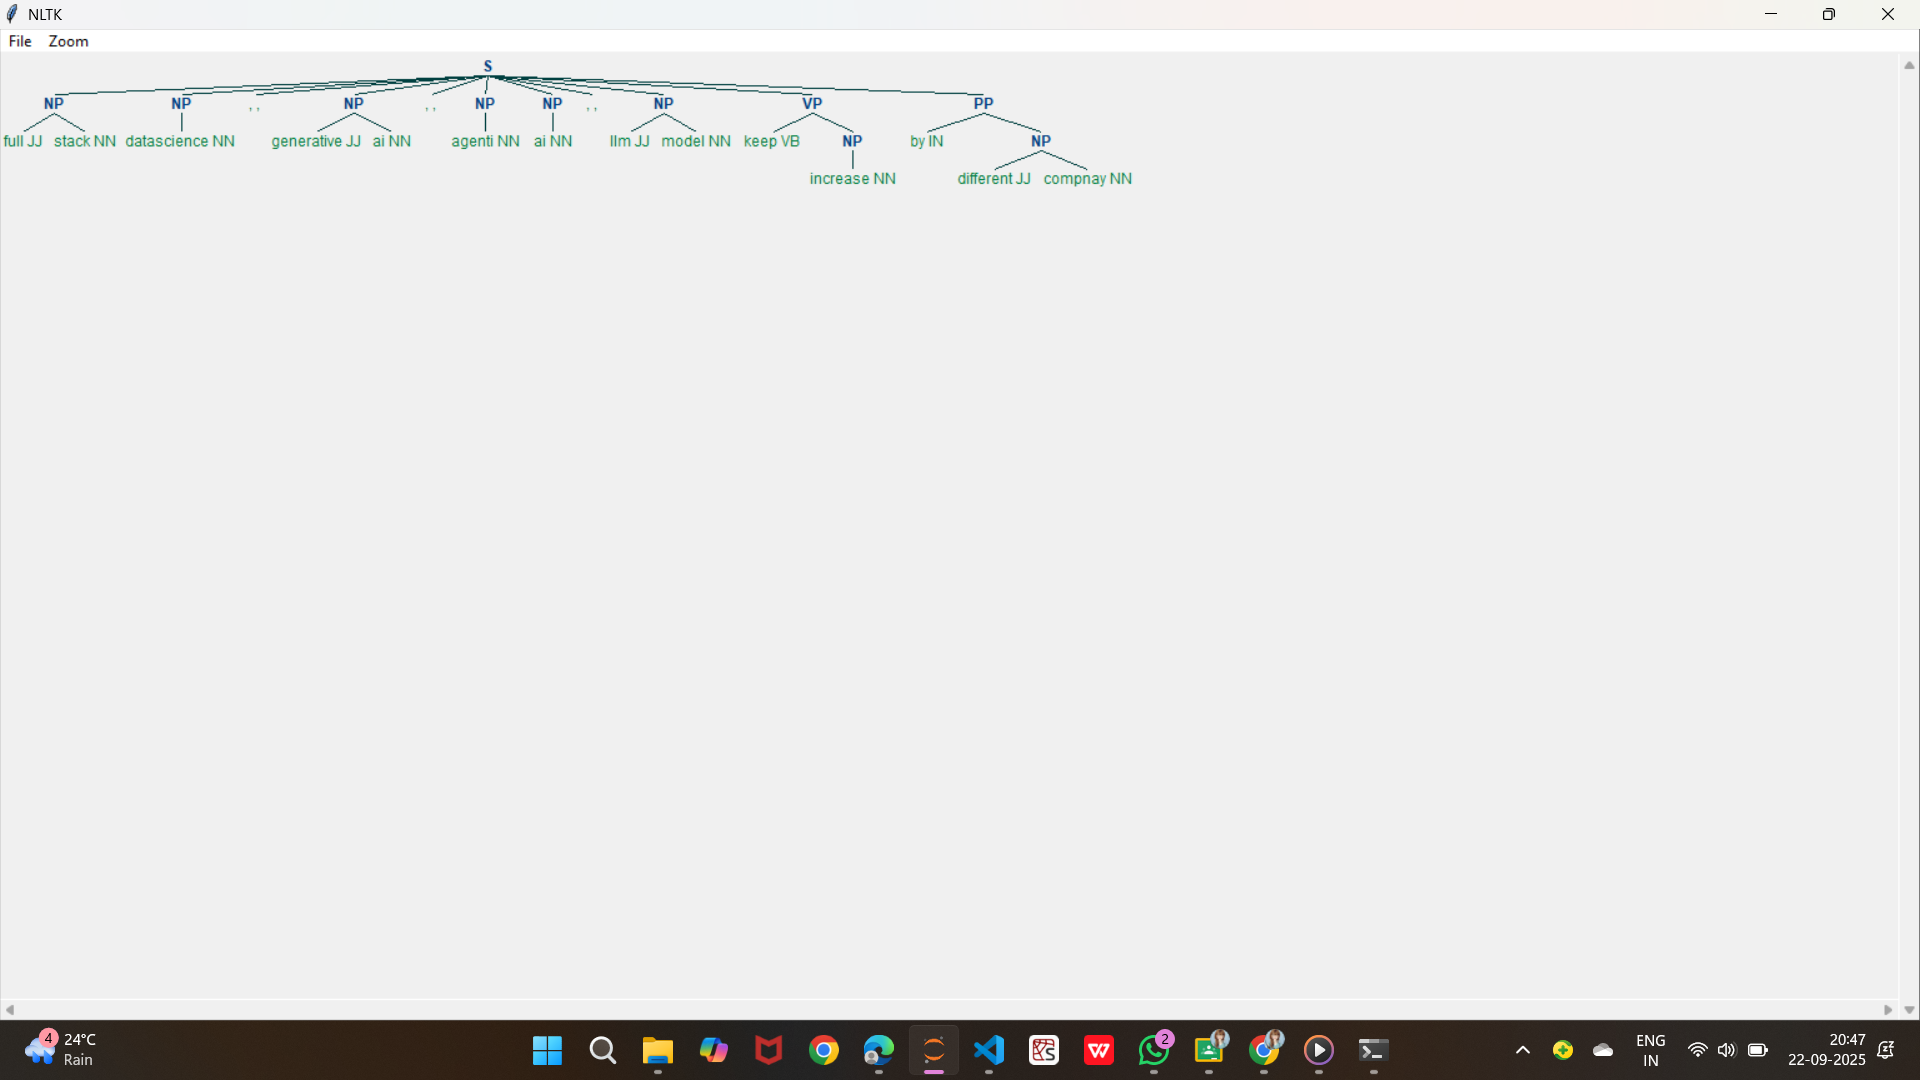

# Chunking in LLMs

- In **NLP with NLTK**, chunking = grouping tokens into phrases.
- In **LLMs (Large Language Models)**, chunking = splitting **long text into smaller parts (chunks)** so that models like GPT can process them within their context window.

**Why?**
- LLMs (like GPT-2, GPT-3, BERT, T5) have a **fixed token limit.**
- Chunking long documents ensures the model can process text without losing information.

In [7]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load a pre-trained model and tokenizer
model_name = "gpt2"  # You can replace with any other LLM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def chunk_text(text, max_length=512):
    """Chunk text into smaller pieces."""
    tokens = tokenizer.encode(text, return_tensors='pt')[0]
    chunks = []

    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        chunks.append(chunk)

    return chunks

def generate_responses(chunks):
    """Generate responses for each chunk using the LLM."""
    responses = []
    for chunk in chunks:
        input_ids = chunk.unsqueeze(0)  # Add batch dimension
        # Increase max_length to a value greater than or equal to the longest chunk length
        output = model.generate(input_ids, max_length=512)  # Generate response
        responses.append(tokenizer.decode(output[0], skip_special_tokens=True))

    return responses

# Example long text
long_text = "india " * 5  # Repeat to simulate long text

# Chunk the text
chunks = chunk_text(long_text)

# Generate responses for each chunk
responses = generate_responses(chunks)

# Print the responses
for i, response in enumerate(responses):
    print(f"Response for chunk {i+1}:\n{response}\n")

#print(responses)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

C:\Users\91918\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91918\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

ImportError: 
AutoModelForCausalLM requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForCausalLM".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.
